### Table of Contents

### Data analysis (preprocessing, heap's law, zief's law, bigram)

### Word Clouds

### LDA
*  LDA over all years and logistic regression - unigram

* Logistic Regression

Note
Y variable is 1 = cited above median (4), 0 = anything less than 4

In [1]:
import pickle, re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer
import matplotlib.pyplot as plt
import numpy as np
import spacy

# Get the data and check it

In [2]:
# unpickled_df = pd.read_pickle("C:/Users/amt/Documents/0. MSc Tinbergen/block 5. NLP/extracted_data.pkl")
unpickled_df = pd.read_pickle(r"C:\Users\marco\Desktop\NLP\extracted_data.pkl")
#unpickled_df = pd.read_pickle(r"C:/Users/USER/Documents/Python/NLP/extracted_data.pkl")


* Take out the nan values

In [3]:
df = unpickled_df[unpickled_df['description'].notna()]
df

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,article_number,pageRange,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor,h_index
17,2-s2.0-85103948648,10.1016/j.compag.2021.106132,S0168169921001502,None,"Design, development, and performance evaluatio...",ar,Article,Massah J.,60023636;60022927,Gorgan University of Agricultural Sciences and...,...,106132,None,One of the applications of robotic farmer-assi...,Evolutionary algorithms | Machine vision | Sup...,0,0,None,undefined,None,10
18,2-s2.0-85102449056,10.1007/s40171-021-00262-0,None,None,Technology and Entrepreneurial Marketing Decis...,ar,Article,Polas M.R.H.,109606759,Limkokwing University of Creative Technology,...,None,95-112,The prime concern of this study is to explore ...,Bangladesh | COVID-19 | Entrepreneurial market...,2,1,None,undefined,None,1
19,2-s2.0-85099393297,10.1016/j.tourman.2021.104288,S0261517721000078,None,Value proposition operationalization in peer-t...,ar,Article,Ramos-Henríquez J.M.,60003044,Universidad de la Laguna,...,104288,None,The purpose of this paper is to operationalize...,Classification | Features selection | Machine ...,0,0,None,undefined,Fundación CajaCanarias,3
20,2-s2.0-85105288221,10.1016/j.comcom.2021.04.012,S0140366421001481,None,Social media privacy management strategies: A ...,ar,Article,Chung K.C.,60078643;60014390,National Penghu University;Providence Universi...,...,None,122-130,Artificial intelligence (AI) is widely used in...,Artificial intelligence | Information security...,0,0,None,undefined,None,4
21,2-s2.0-85078802894,10.1016/j.jbusres.2020.01.029,S0148296320300369,None,Brain buzz for Facebook? Neural indicators of ...,ar,Article,Zhang J.,60007511,Sungkyunkwan University,...,None,444-452,Marketing in social media is gaining importanc...,Content engagement | Event-related potentials ...,1,0,NRF,2015H1A2A1031721,National Research Foundation of Korea,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5129,2-s2.0-0022028267,None,None,None,AI MARKET PROSPECTS ARE GOOD.,ar,Article,Friscia A.,100407440,Int Data Corp,...,None,41-42,Artificial intelligence (AI) has been referred...,None,0,0,None,undefined,None,0
5131,2-s2.0-0022192653,10.1016/0747-5632(85)90022-6,0747-5632(85)90022-6,None,Psychological decision support software for th...,ar,Article,Eyde L.D.,100590404,U.S. Office of Personnel Management,...,None,321-336,"Decision Support Systems, when based on psycho...",None,4,0,None,undefined,None,8
5134,2-s2.0-0000133127,10.1016/0361-3682(84)90020-5,0361-3682(84)90020-5,None,The role of attention and memory in accounting...,ar,Article,Birnberg J.,60015543;60010065,University of Pittsburgh;The University of Ari...,...,None,365-382,Behavioral research in accounting has ignored ...,None,45,0,None,undefined,None,15
5136,2-s2.0-84976796492,10.1145/953032.804603,None,None,Personal computing: An Adventure of the mind,ar,Article,Rine D.,60010100,Western Illinois University,...,None,8,“A National Educational TV Series at Pre-Colle...,None,0,0,None,undefined,None,12


# Corpus warm-up:

* First, make all words in abstract lower cases
* Create the corpus of abstracts

In [4]:
#lower case and save it as corpus
#suggestion: list index

def column_to_lower(df, column):
    """
        Input: df and a corresponding column
        Output: converted dataframe column 
        Function: Converts all strings in a column of a dataframe to lowercases.
    """
    return df[column].str.lower()

df.loc[:,'description'] = column_to_lower(df, 'description')

corpus = df["description"].tolist()

C:\Users\marco\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [5]:
#check how some values look like
corpus[0]
#type(corpus[0])
#len(corpus)
#1028 abstracts

'one of the applications of robotic farmer-assistant platforms equipped with machine vision systems is the evaluation of production yield before harvest without damaging the product. in this situation, farmers receive proper information for harvesting and post-harvesting management to decide about the required human resources, harvesting equipment, storage space, transportation, and product marketing. in this study, a machine vision system on a tracked vehicle was designed and developed for yield estimation of kiwifruit by traveling along the kiwifruit trellis. several features, i.e., intensity histogram, the histogram of oriented gradients, shape context, and local binary pattern, were extracted from the images captured from the plants, and the number of kiwifruits in the images was predicted using the support vector machine (svm). to improve the performance of the svm, its parameters were optimized using evolutionary optimization methods, namely, particle swarm optimization (pso), an

In [6]:
#to count the amount of words in the entire dataset, also repeating
corpus_all = []

for i in range(0,len(corpus)):
    res = re.findall(r'\w+', str(corpus[i]))
    corpus_all.extend(res)
    
#corpus_all
#len(corpus_all)
#type(corpus_all)
#print(corpus_all)

* Create a list all the unique words in the corpus

In [7]:
#counting unqiue words in coprus

lister = []
for i in corpus_all:
    if i not in lister:
        lister.append(i)
            
#print(lister)
print("There are", len(lister), "unique words in that list")

There are 14055 unique words in that list


* Tokenize and check the words most frequent in the entire corpus

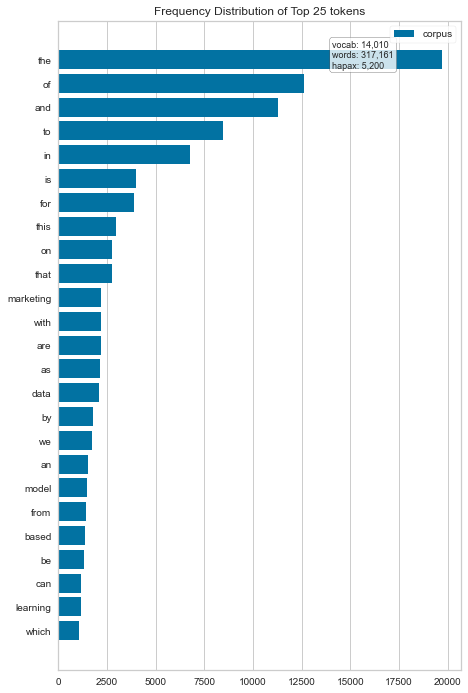

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [8]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25, size= (520, 860))
visualizer.fit(docs)
visualizer.show()

A function that takes as inputs a visualizer object and the number of words to be plotted and returns the **Zipf's law plot**

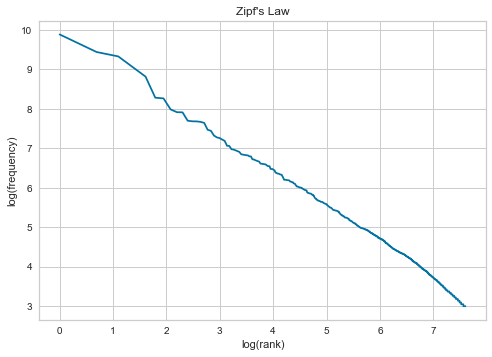

In [9]:
def zipf_law_plot(visualizer_obj, n):
    # Create a Dataframe with 2 columns: the word and the number of times it has been used
    word_count = pd.DataFrame({"word":visualizer_obj.features,
                               "count":visualizer_obj.freqdist_})
    # Ordering words based on the number of times they have been used and resetting index
    word_count = word_count.sort_values(by = "count", ascending = False)
    word_count.reset_index(inplace = True, drop = True)
    # Plotting
    plt.plot(np.log(np.arange(1,n+1)), np.log(word_count.iloc[:n,1]))
    plt.title("Zipf's Law")
    plt.xlabel("log(rank)")
    plt.ylabel("log(frequency)")

n_words_zipf = 2000 # The number of words with highest count we include in the plot
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

### Take out english stopwords and check which are the most used words

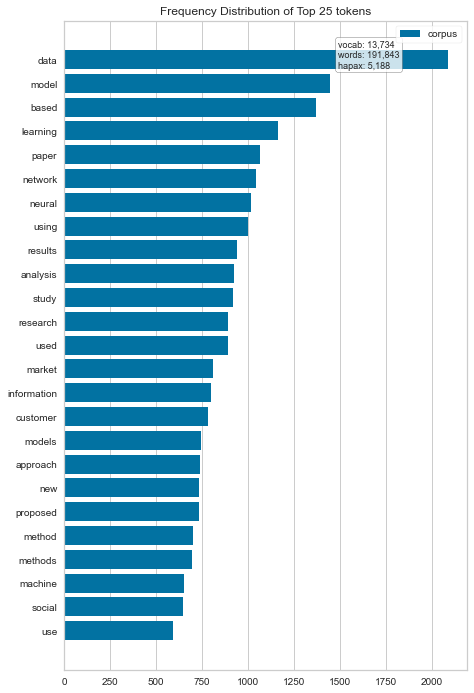

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [10]:
#we are adding marketing to our stopwords list
#What kinds of words should we include in our stopwords list?
#

my_stop_words = text.ENGLISH_STOP_WORDS.union(["marketing"])

vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

**Zipf's law plot** excluding English stop words

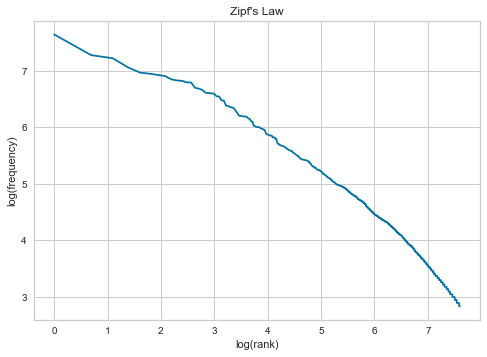

In [11]:
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

In [12]:
#list of english stopwords 
#from sklearn.feature_extraction import stop_words
#print(stop_words.ENGLISH_STOP_WORDS)

In [13]:
'detail' in corpus_all

True

* Check the most popular words only for some years

In [14]:
#Try to use column than index if possible

from datetime import datetime, timedelta
df['coverDate'] = df['coverDate'].astype('datetime64')

<ipython-input-14-4bf6fcbed0bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coverDate'] = df['coverDate'].astype('datetime64')


In [15]:
df = df.set_index('coverDate')

In [16]:
df["coverDate"] = df.index #terrible to add this columns equal to the index, but the LDA part uses it several times


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

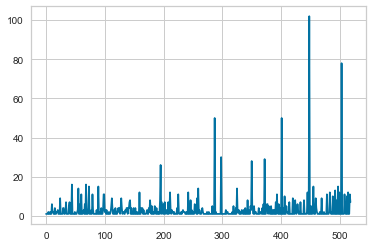

In [18]:
#number of articles published per date (dates with 0 articles are not ont he chart)
plt.plot(df.description.groupby(df.index.date).count().tolist())
plt.show()

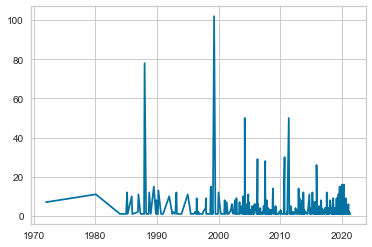

In [19]:
plt.plot(df.index.unique(),df.description.groupby(df.index.date).count().tolist())
plt.show()

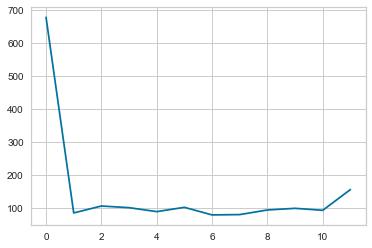

In [20]:
#number of articles published per month (months with 0 articles are not ont he chart)
#the aggregation is done per month. we can see that a lot is published in january, 
#a bit in December, but less at the end of summer
plt.plot(df.description.groupby(df.index.month).count().tolist())
plt.show()

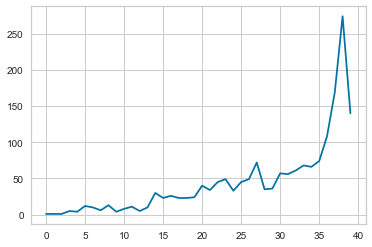

In [21]:
#number of articles published per year, for the years that 
plt.plot( df.description.groupby(df.index.year).count().tolist())
plt.show()

In [22]:
df.description.groupby(df.index.year).count()

coverDate
1972      1
1980      1
1984      1
1985      5
1986      4
1987     12
1988     10
1989      6
1990     13
1991      4
1992      8
1993     11
1994      5
1995     10
1996     30
1997     23
1998     26
1999     23
2000     23
2001     24
2002     40
2003     34
2004     45
2005     49
2006     33
2007     45
2008     49
2009     72
2010     35
2011     36
2012     57
2013     56
2014     61
2015     68
2016     66
2017     74
2018    108
2019    169
2020    274
2021    140
Name: description, dtype: int64

count    1751.000000
mean       22.796688
std        59.445378
min         0.000000
25%         1.000000
50%         5.000000
75%        19.000000
max      1086.000000
Name: citedby_count, dtype: float64


(array([986., 235., 126.,  67.,  68.,  24.,  37.,  31.,  29.,  13.,  15.,
         18.,  14.,   8.,   5.,   3.,   6.,   6.,   5.,   2.,   8.,   2.,
          6.,   2.,   1.,   3.,   2.,   0.,   2.,   3.,   1.,   2.,   1.,
          0.,   0.,   4.,   1.,   0.,   0.,   1.,   0.,   2.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

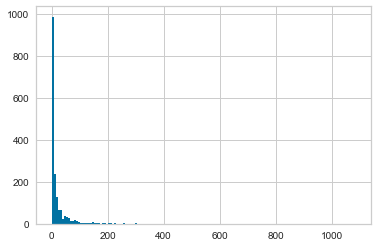

In [23]:
#plot citations
print(df['citedby_count'].describe())
plt.hist(df['citedby_count'], bins = 150)

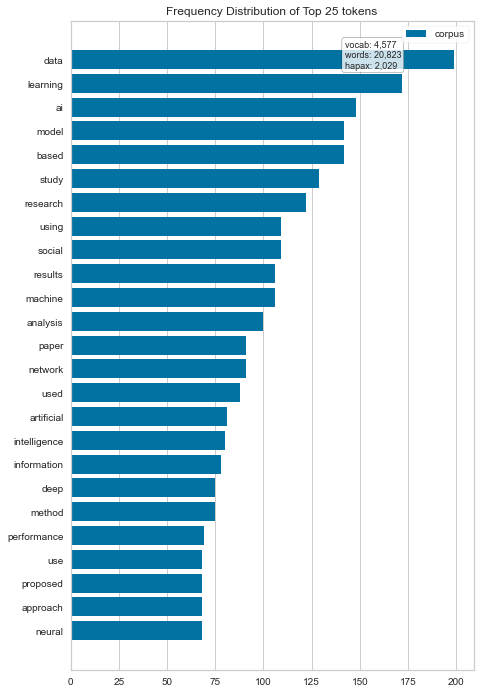

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [24]:
# analysis on 'year 2021'

vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[0:171])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

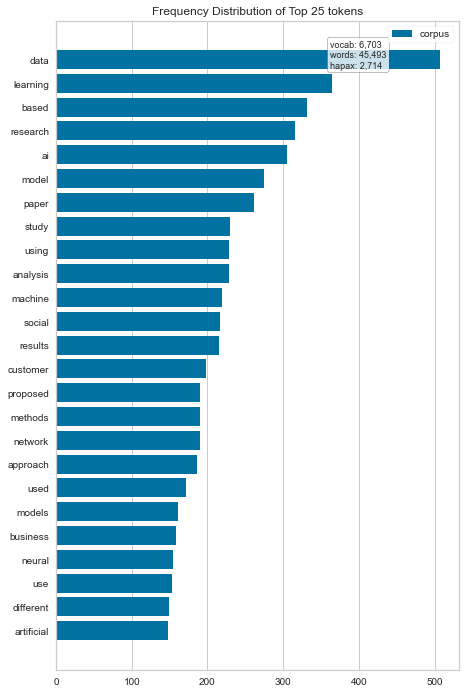

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [25]:
#year 2020
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[171:546])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

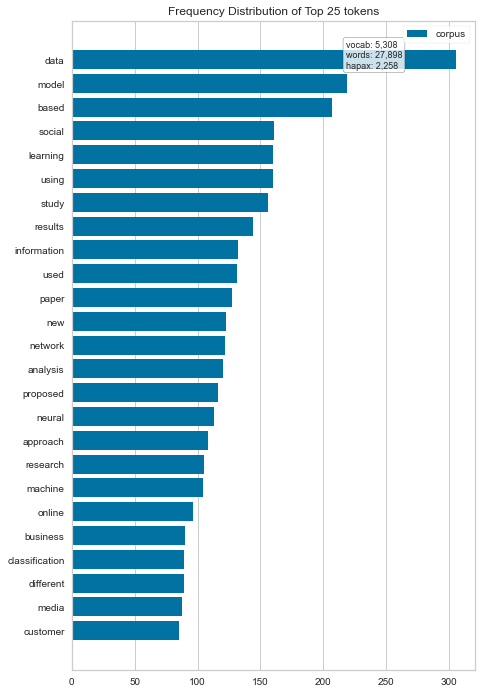

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [26]:
#year 2019
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[546:775])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

-----

**Heap's law plot**

*** The plot shows that our corpus follows the heap's law


Text(0, 0.5, 'n of unique words')

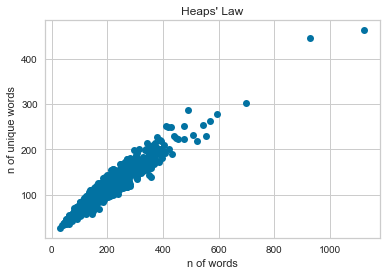

In [27]:
#Heap's law
n_words = []
n_unique_words = []

for i in range(0,len(corpus)):
    res = [word.lower() for word in re.findall(r'\w+', corpus[i])]
    n_unique_words.append(len(set(res)))
    n_words.append(len(res))
    
plt.plot(n_words, n_unique_words, "o")
plt.title("Heaps' Law")
plt.xlabel("n of words")
plt.ylabel("n of unique words")

----

### Pre-processing:  Lemmatizing & Tokenization

In [28]:
import spacy
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('averaged_perceptron_tagger')
spacyen = spacy.load('en_core_web_sm')

In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
lemmatizer.lemmatize(re.findall(r'\w+', corpus[0])[22])

'without'

In [31]:
import nltk
#nltk.download('averaged_perceptron_tagger')

(nltk.pos_tag([lemmatizer.lemmatize(re.findall(r'\w+', corpus[0])[22])])[0][1]).lower()

'in'

### Creating corpus1 and corpus2

In [32]:
#Select the words that are not numeric and longer than 1 character
#New variable: corpus2

from nltk.tokenize import RegexpTokenizer
import gensim
from gensim.utils import simple_preprocess

#def remove_stopwords(texts):
#    return [[word for word in simple_preprocess(str(doc)) 
#            if word not in my_stop_words] for doc in texts]

corpus_tkn = corpus.copy()

tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(corpus)):
    corpus_tkn[idx] = tokenizer.tokenize(str(corpus[idx]))

corpus2 = [[token for token in doc if not token.isnumeric()] for doc in corpus_tkn]
corpus2 = [[token for token in doc if len(token) > 1] for doc in corpus_tkn]

C:\Users\marco\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [33]:
# Includes bigrams and trigrams to corpus2
# Create corpus1 that is the same of corpus2 but WITHOUT bitrigrams
corpus1 = corpus2.copy()

bigram = gensim.models.Phrases(corpus2, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[corpus2], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=my_stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'], bi = True, tri = True):
    """
    Remove Stopwords, Lemmatization and Form Bigrams and Trigrams [if bi = True, tri = True (by default)]
    If bi and tri are set to false, Bigrams and Trigrams are not added to texts
    
    """
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    if bi:
        texts = [bigram_mod[doc] for doc in texts]
    if tri:
        texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

corpus2 = process_words(corpus2)  # processed Text Data!
corpus1 = process_words(corpus1 , bi = False, tri = False)

In [34]:
print(corpus2[0]) # Checking if it correctly added the bigrams
print("\n")
print(corpus1[0]) # Checking that bigrams are not there 

['application', 'robotic', 'farmer', 'assistant', 'platform', 'equip', 'machine_vision', 'evaluation', 'production', 'yield', 'harvest', 'damaging', 'product', 'situation', 'farmer', 'receive', 'proper', 'information', 'harvesting', 'post', 'harvesting', 'management', 'decide', 'require', 'human', 'resource', 'harvesting', 'equipment', 'storage', 'space', 'transportation', 'product', 'study', 'machine_vision', 'track', 'vehicle', 'design', 'develop', 'yield', 'estimation', 'kiwifruit', 'travel', 'kiwifruit', 'trelli', 'feature', 'intensity', 'histogram', 'histogram', 'orient', 'gradient', 'shape', 'context', 'local', 'binary', 'pattern', 'extract', 'image', 'capture', 'plant', 'number', 'kiwifruit', 'image', 'predict', 'use', 'svm', 'improve', 'performance', 'svm', 'parameter', 'optimize', 'use', 'evolutionary', 'optimization', 'method', 'ant', 'colony', 'optimization', 'aco', 'performance', 'propose', 'method', 'compare', 'deep_learne', 'technique', 'predict', 'number', 'kiwifruit', '

## Count corpus sentences
Note: if we need the sentences as well, we should extract them 

In [35]:
re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0])

['one of the applications of robotic farmer-assistant platforms equipped with machine vision systems is the evaluation of production yield before harvest without damaging the produ',
 'in this situation, farmers receive proper information for harvesting and post-harvesting management to decide about the required human resources, harvesting equipment, storage space, transportation, and product marketi',
 'in this study, a machine vision system on a tracked vehicle was designed and developed for yield estimation of kiwifruit by traveling along the kiwifruit trell',
 'several features, i.e., intensity histogram, the histogram of oriented gradients, shape context, and local binary pattern, were extracted from the images captured from the plants, and the number of kiwifruits in the images was predicted using the support vector machine (svm). to improve the performance of the svm, its parameters were optimized using evolutionary optimization methods, namely, particle swarm optimization (pso)

In [36]:
len(re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0]))

8

In [37]:
corpus_sentences = []

for i in range(0,len(corpus)):
    #split the current abstract into sentences
    sentences = re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[i])
    #nr of sentences in current abstract
    nr_of_sentences = len(sentences)
    corpus_sentences.append(nr_of_sentences)

In [38]:
df.loc[:,'nr_sentences_abstract'] = corpus_sentences

In [39]:
df.nr_sentences_abstract.describe()

count    1751.000000
mean        7.834951
std         3.291487
min         1.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        40.000000
Name: nr_sentences_abstract, dtype: float64

In [40]:
#print(df.nr_sentences_abstract.sum(), "total number of sentences")
#print(df.nr_sentences_abstract.median(), "median")
#print(df.nr_sentences_abstract.describe())
#print(df.loc[df['nr_sentences_abstract'] == 46]['description'].values)

In [41]:
df.loc[df['nr_sentences_abstract'] == 40]['description'].values # Before it was 46, then 41, now it seems to be 40... what did we remove?

array(['chapter 1: how australia improved health equity through action on the social determinants of health: do not think that the social determinants of health equity are old hat. in reality, australia is very far away from addressing the societal level drivers of health inequity. there is little progressive policy that touches on the conditions of daily life that matter for health, and action to redress inequities in power, money and resources is almost non-existent. in this chapter we ask you to pause this reality and come on a fantastic journey where we envisage how covid-19 was a great disruptor and accelerator of positive progressive action. we offer glimmers of what life could be like if there was committed and real policy action on the social determinants of health equity. it is vital that the health sector assists in convening the multisectoral stakeholders necessary to turn this fantasy into reality. chapter 2: aboriginal and torres strait islander connection to culture: buil

In [42]:
#df.loc[df['nr_sentences_abstract'] == 41]['description']
#re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', df.loc[1922]["description"])

### Keywords

In [43]:
keywords = df["authkeywords"].tolist()
print(keywords[1])

Bangladesh | COVID-19 | Entrepreneurial marketing decisions | Opportunity development | Opportunity exploitation | Opportunity recognition | Technology


In [44]:
keywords_paper = [] # List of the keywords associated to each paper (another list)
keywords_all = [] # List of all the keywords (the same keyword can be repeated more than once)

for i in range(0, len(keywords)):
    # Some articles do not have keywords, set it to nan
    if keywords[i] == None:
        res = pd.NA
    else:
        # The keywords are separated by " | ", using it to split them
        res = keywords[i].split(" | ")
        keywords_all.extend(res) # Must be inside the else block, otherwise get error: 'NAType' object is not iterable
    keywords_paper.append(res)

# Checking if okay
print(keywords_all[5000])
print(keywords_paper[50])

text classification
['classification', 'clustering', 'deep learning', 'lexical features', 'online advertisement']


# (Very) Basic sentiment analysis

### TO DO:
- Eliminate "ieee" in pre-processing as they might influence sentiment analysis

In [45]:
# Sentiment analysis using textblob
from textblob import TextBlob

subjectivity_list = []
polarity_list =[]
corpus1_as_sentence = []

for abstr in corpus1:
    corpus1_as_sentence.append(" ".join(abstr))

for abstr in corpus1_as_sentence:
    # TextBlob().sentiment returns the sentiment associated with a sentence (or sentences in this case)
    subjectivity_list.append(TextBlob(abstr).sentiment[1]) # [1] because we take only the subjetivity measure
    polarity_list.append(TextBlob(abstr).sentiment[0])# with .sentiment[0] we get an index in the range [-1,+1] that reports the positity/negativity of the sentence

# merge it with the dataframe
df["corpus1"] = corpus1_as_sentence
df["abs_subjectivity"] = subjectivity_list
df["abs_polarity"] = polarity_list
print(max(df["abs_subjectivity"]))
print(min(df["abs_subjectivity"]))

# check if correlated with number of citations
print(np.corrcoef(df["abs_subjectivity"], df.citedby_count))
print(np.corrcoef(df["abs_polarity"], df.citedby_count))

# check one of the most subjective sentences (does not sound that subjective)
print("\nMost subjective sentence according to TextBlog (from raw data):")
print(df[df["abs_subjectivity"] == max(df["abs_subjectivity"])].description.values[1])
print("\nMost subjective sentence according to TextBlog (after data cleaning):")
print(df[df["abs_subjectivity"] == max(df["abs_subjectivity"])].corpus1.values[1])
#print(list((df["abs_subjectivity"] == max(df["abs_subjectivity"]))))

# Check the most negative sentence
print("\nMost negative sentence according to TextBlog:")
print(df[df["abs_polarity"] == min(df["abs_polarity"])].description.values[0])

1.0
0.0
[[ 1.         -0.01945625]
 [-0.01945625  1.        ]]
[[1.         0.06110161]
 [0.06110161 1.        ]]

Most subjective sentence according to TextBlog (from raw data):
the estimated probability that spinning reserve is called and generated is considered crucial in the formulation of generation scheduling to simulate the spinning reserve uncertainty. in this paper, artificial neural network (ann) is applied for forecasting the spinning reserve probability considering line limits, line and generator outages, market prices, bidding strategy, and load and spinning reserve patterns. © 2005 ieee.

Most subjective sentence according to TextBlog (after data cleaning):
estimate probability spin reserve generate consider crucial formulation generation scheduling simulate spin reserve uncertainty paper artificial neural network ann apply forecasting spinning reserve probability consider line limit line generator outage market price bid strategy load spin reserve pattern ieee

Most nega

In [46]:
# Sentiment analysis using pysentiment2
import pysentiment2 as ps
lm = ps.LM()
list_scores = []
for i in range(0,len(corpus)):
    tokens = lm.tokenize(corpus[i])
    score = lm.get_score(tokens)
    list_scores.append(score)

In [47]:
# create dataframe od pysentiment2 scores with same index of df
df_sentiment = pd.DataFrame.from_dict(list_scores) 
df_sentiment.set_index(df.index, drop = True, inplace = True)

In [48]:
# printing most subjective sentence according to pysentiment2
print(df[df_sentiment.Subjectivity == max(df_sentiment.Subjectivity)].description.values[0])

# check if Subjectivity correlated with number of citations
print("\nCORRELATION:\n", np.corrcoef(df_sentiment.Subjectivity, df.citedby_count))

# check if Polarity correlated with number of citations
print(np.corrcoef(df_sentiment.Polarity, df.citedby_count))

electronic products may be subjected to shock and vibration during shipping, normal usage, and accidental drop. high strain rate transient bending produced by such loads may result in failure of fine pitch electronic interconnects. current experimental techniques rely on electrical resistance for determination of failure. significant advantage can be gained by prior knowledge of impending failure for applications where the consequences of system failure may be catastrophic. this research effort focuses on an alternate approach to damage quantification in electronic assemblies subjected to shock and vibration, without testing for electrical continuity. the proposed approach can be extended to monitor product level damage. in this paper, statistical pattern recognition and leading indicators of shock damage have been used to study the damage initiation and progression in shock and drop of electronic assemblies. statistical pattern recognition is currently being employed in a variety of e

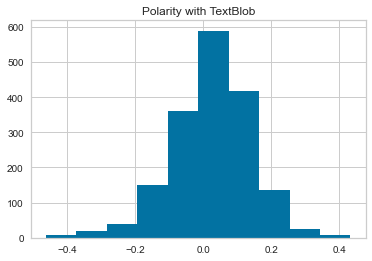

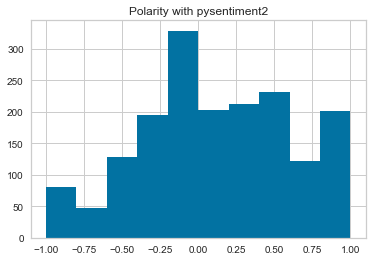

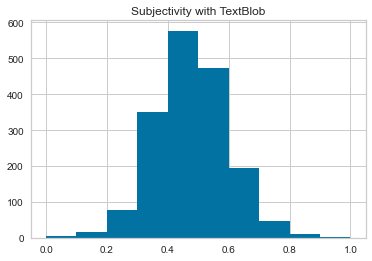

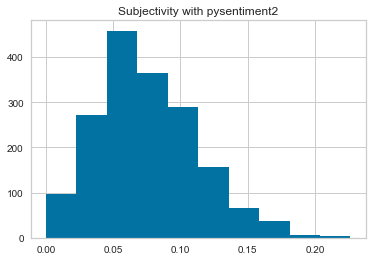

In [49]:
# HISTOGRAMS with the distribution of scores with the 2 packages
plt.hist(df["abs_polarity"])
plt.title("Polarity with TextBlob")
plt.show()
plt.hist(df_sentiment["Polarity"])
plt.title("Polarity with pysentiment2")
plt.show()
plt.hist(df["abs_subjectivity"])
plt.title("Subjectivity with TextBlob")
plt.show()
plt.hist(df_sentiment["Subjectivity"])
plt.title("Subjectivity with pysentiment2")
plt.show()

----

## Word cloud


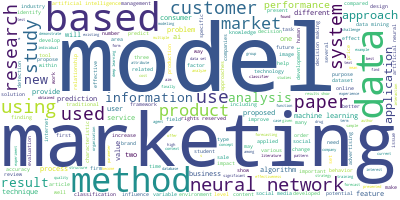

In [50]:
from wordcloud import WordCloud


long_string = ','.join(list(df['description'].values))
#print(long_string[1:100])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

# LDA - unigram

In [51]:
#out1 = df['description'].values #unigram

def sent_to_words(sentences):
    for sentence in sentences:
        #deacc = True -> removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

data_words = list(sent_to_words(corpus))

#print(data_words[:1][0][:30])


In [52]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]


#print(corpus[:1][0][:30])

In [53]:
from pprint import pprint

num_topics = 15

lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50, decay = 0.6)

lda_model.save('lda_model.model')

doc_lda = lda_model[corpus]


In [54]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           workers = 7,
                                           random_state=100,
                                           chunksize=200,
                                           passes=2,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [55]:
print(lda_model.print_topics(20, num_words = 20))

[(0, '0.052*"of" + 0.052*"the" + 0.025*"and" + 0.023*"in" + 0.019*"to" + 0.015*"for" + 0.010*"that" + 0.009*"are" + 0.008*"as" + 0.007*"is" + 0.007*"this" + 0.007*"on" + 0.006*"with" + 0.006*"we" + 0.005*"data" + 0.005*"information" + 0.005*"drug" + 0.005*"by" + 0.004*"from" + 0.004*"more"'), (1, '0.040*"and" + 0.036*"of" + 0.022*"the" + 0.016*"to" + 0.014*"in" + 0.010*"for" + 0.010*"research" + 0.010*"this" + 0.010*"marketing" + 0.009*"reviews" + 0.008*"analysis" + 0.008*"on" + 0.008*"customer" + 0.008*"are" + 0.007*"business" + 0.007*"that" + 0.006*"can" + 0.006*"methods" + 0.005*"were" + 0.005*"online"'), (2, '0.058*"the" + 0.035*"of" + 0.029*"and" + 0.028*"to" + 0.020*"in" + 0.013*"is" + 0.012*"we" + 0.012*"on" + 0.011*"for" + 0.009*"that" + 0.009*"this" + 0.007*"with" + 0.007*"based" + 0.007*"data" + 0.007*"learning" + 0.007*"are" + 0.006*"social" + 0.006*"as" + 0.006*"by" + 0.006*"from"'), (3, '0.046*"the" + 0.037*"and" + 0.029*"of" + 0.025*"in" + 0.018*"to" + 0.015*"learning" + 

In [56]:
#Converting LDA model output (topic distribution per document) to regression varaibles
#print(lda_model.print_topics(20, num_words = 15)[:10])

train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    train_vecs.append(topic_vec)
    
print(len(train_vecs))

1751


y should be weighted because earlier publications usually dont have 
fair chance to be cited. Thus, we weight the y variable. 
Or, we should delete the publications published after 2020-6-1

For now, no logical methods is proposed. Thus, we restrict our sample size.

In [57]:
#logistic regression - unigram
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
import numpy as np

#X = np.column_stack([train_vecs, df.index.year, df.h_index])
X = np.column_stack([df.index.year, df.h_index])
y = np.array(df.citedby_count)
y[y<=np.median(y)] = 0
y[y>np.median(y)] = 1
#One as it is
#One just with train index
#

kf = KFold(10, shuffle = True, random_state = 42)

cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

Logistic Regression Val f1: 0.683 +- 0.045
Logisitic Regression SGD Val f1: 0.698 +- 0.043
SVM Huber Val f1: 0.400 +- 0.327


In [58]:
print(lr.coef_, lr.intercept_)

[[-0.43836945  1.223113  ]] [0.14433826]


#We create a handful of LDA models with different topic values, 
#then see how these perform in the supervised classification model training
#This is specific to our goal

 We can also run HDP, which seeks to learn the correct number of topics
 from the data, that is, you don't need to provide a fixed number of topics.
 In the end, we expect to run a basic logistic regression - to be done later

When topic = 20

Logistic Regression Val f1: 0.564 +- 0.045
Logisitic Regression SGD Val f1: 0.504 +- 0.067
SVM Huber Val f1: 0.462 +- 0.304
    
When topic = 15
Logistic Regression Val f1: 0.545 +- 0.047
Logisitic Regression SGD Val f1: 0.563 +- 0.049
SVM Huber Val f1: 0.402 +- 0.329
    
When topic = 10

Logistic Regression Val f1: 0.563 +- 0.047
Logisitic Regression SGD Val f1: 0.561 +- 0.090
SVM Huber Val f1: 0.401 +- 0.328
    
When topic = 5

Logistic Regression Val f1: 0.530 +- 0.037
Logisitic Regression SGD Val f1: 0.532 +- 0.066
SVM Huber Val f1: 0.393 +- 0.321

## LDA - bigram + trigram + logistic regression


In [59]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
dictionary2 = Dictionary(corpus2)
dictionary2.filter_extremes(no_below=20, no_above=0.5)
bi_corpus = [dictionary2.doc2bow(doc) for doc in corpus2]

topic = []
perplexity= []
decay = []

num_topics = 20
temp = dictionary2[0]  # This is only to "load" the dictionary.

# #topic: 20, decay: 0.6
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = num_topics, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.6)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))

topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

1.5851520596422394e-07


In [60]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=bi_corpus,
                                           id2word=dictionary2,
                                           num_topics=k, 
                                           workers = 7,
                                           random_state=100,
                                           chunksize=200,
                                           passes=2,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus2, dictionary=dictionary2, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [61]:
from gensim.models import CoherenceModel
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 5
max_topics = 20
step_size = 5
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(bi_corpus)
corpus_sets = [gensim.utils.ClippedCorpus(bi_corpus, int(num_of_docs*0.75)), 
               bi_corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha va
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary2, 
                                                  k=k, a=a, b=b)
                    print(cv)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('./results/lda_tuning_results.csv', index=False)
    pbar.close()

  1%|          | 1/180 [00:07<23:01,  7.72s/it]

0.3073806325812979


  1%|          | 2/180 [00:15<22:46,  7.68s/it]

0.3083743157076058


  2%|▏         | 3/180 [00:22<22:39,  7.68s/it]

0.31044542793787855


  2%|▏         | 4/180 [00:30<22:29,  7.67s/it]

0.31342654687679083


  3%|▎         | 5/180 [00:38<22:24,  7.68s/it]

0.30640614761259705


  3%|▎         | 6/180 [00:46<22:20,  7.71s/it]

0.3088761078495246


  4%|▍         | 7/180 [00:53<22:14,  7.72s/it]

0.303203190292208


  4%|▍         | 8/180 [01:02<22:30,  7.85s/it]

0.3077327408780267


  5%|▌         | 9/180 [01:09<22:24,  7.86s/it]

0.30816137656107057


  6%|▌         | 10/180 [01:17<22:15,  7.86s/it]

0.303203190292208


  6%|▌         | 11/180 [01:25<22:13,  7.89s/it]

0.30154467035437776


  7%|▋         | 12/180 [01:33<22:17,  7.96s/it]

0.3093964786695776


  7%|▋         | 13/180 [01:42<22:21,  8.03s/it]

0.3116142209240949


  8%|▊         | 14/180 [01:50<22:10,  8.02s/it]

0.3157619807049184


  8%|▊         | 15/180 [01:58<22:04,  8.03s/it]

0.30709436630360687


  9%|▉         | 16/180 [02:06<21:54,  8.02s/it]

0.3096654346781962


  9%|▉         | 17/180 [02:14<21:50,  8.04s/it]

0.31219415050921656


 10%|█         | 18/180 [02:22<21:42,  8.04s/it]

0.3201687166964942


 11%|█         | 19/180 [02:30<21:36,  8.05s/it]

0.31627263945703754


 11%|█         | 20/180 [02:38<21:34,  8.09s/it]

0.3111358358590678


 12%|█▏        | 21/180 [02:46<21:30,  8.12s/it]

0.30743463691599116


 12%|█▏        | 22/180 [02:55<21:45,  8.26s/it]

0.303203190292208


 13%|█▎        | 23/180 [03:03<21:58,  8.40s/it]

0.307981946678992


 13%|█▎        | 24/180 [03:12<21:44,  8.36s/it]

0.30816137656107057


 14%|█▍        | 25/180 [03:20<21:34,  8.35s/it]

0.303203190292208


 14%|█▍        | 26/180 [03:29<21:33,  8.40s/it]

0.3057627701064191


 15%|█▌        | 27/180 [03:37<21:27,  8.42s/it]

0.3059834374820546


 16%|█▌        | 28/180 [03:45<21:16,  8.40s/it]

0.304576840287783


 16%|█▌        | 29/180 [03:54<21:08,  8.40s/it]

0.31723867833812563


 17%|█▋        | 30/180 [04:03<21:18,  8.52s/it]

0.30363109634062274


 17%|█▋        | 31/180 [04:13<22:28,  9.05s/it]

0.3106366704464594


 18%|█▊        | 32/180 [04:24<23:37,  9.58s/it]

0.3113763617380255


 18%|█▊        | 33/180 [04:32<22:45,  9.29s/it]

0.3168056703202927


 19%|█▉        | 34/180 [04:44<24:11,  9.94s/it]

0.31554527815700706


 19%|█▉        | 35/180 [04:53<23:49,  9.86s/it]

0.31104788482543205


 20%|██        | 36/180 [05:05<24:31, 10.22s/it]

0.30951024675810634


 21%|██        | 37/180 [05:15<24:13, 10.17s/it]

0.3127462526541511


 21%|██        | 38/180 [05:24<23:46, 10.05s/it]

0.3120734472789594


 22%|██▏       | 39/180 [05:33<22:34,  9.61s/it]

0.31565680217315517


 22%|██▏       | 40/180 [05:42<22:05,  9.47s/it]

0.3087946049513608


 23%|██▎       | 41/180 [05:51<21:23,  9.24s/it]

0.31223028969906896


 23%|██▎       | 42/180 [06:00<20:58,  9.12s/it]

0.3173050395366866


 24%|██▍       | 43/180 [06:08<20:27,  8.96s/it]

0.32122400558284986


 24%|██▍       | 44/180 [06:17<20:01,  8.84s/it]

0.31972326728540446


 25%|██▌       | 45/180 [06:25<19:46,  8.79s/it]

0.31124127829839776


 26%|██▌       | 46/180 [06:34<19:35,  8.77s/it]

0.3165101679803949


 26%|██▌       | 47/180 [06:43<19:28,  8.79s/it]

0.3231298780754491


 27%|██▋       | 48/180 [06:51<19:01,  8.65s/it]

0.31857802503707244


 27%|██▋       | 49/180 [07:00<18:45,  8.59s/it]

0.3175811822007308


 28%|██▊       | 50/180 [07:09<18:56,  8.74s/it]

0.321513034677514


 28%|██▊       | 51/180 [07:17<18:34,  8.64s/it]

0.30812102044397083


 29%|██▉       | 52/180 [07:26<18:14,  8.55s/it]

0.3107426603139697


 29%|██▉       | 53/180 [07:34<18:01,  8.52s/it]

0.3147974915970265


 30%|███       | 54/180 [07:43<18:08,  8.64s/it]

0.31769072482854527


 31%|███       | 55/180 [07:51<17:51,  8.57s/it]

0.30847651879826954


 31%|███       | 56/180 [08:00<17:54,  8.66s/it]

0.30425933235722796


 32%|███▏      | 57/180 [08:09<17:53,  8.72s/it]

0.30816328943654786


 32%|███▏      | 58/180 [08:18<18:03,  8.88s/it]

0.309274115046016


 33%|███▎      | 59/180 [08:29<18:54,  9.37s/it]

0.3146952207907737


 33%|███▎      | 60/180 [08:37<18:16,  9.13s/it]

0.3037290735764337


 34%|███▍      | 61/180 [08:46<17:50,  9.00s/it]

0.31036843510515233


 34%|███▍      | 62/180 [08:57<18:41,  9.50s/it]

0.3063258137653809


 35%|███▌      | 63/180 [09:07<19:04,  9.78s/it]

0.3063811123636324


 36%|███▌      | 64/180 [09:16<18:27,  9.55s/it]

0.31092523568643937


 36%|███▌      | 65/180 [09:26<18:09,  9.47s/it]

0.3080178778164988


 37%|███▋      | 66/180 [09:37<18:53,  9.94s/it]

0.3058898506343418


 37%|███▋      | 67/180 [09:47<18:58, 10.07s/it]

0.3066340169299676


 38%|███▊      | 68/180 [09:57<18:59, 10.18s/it]

0.3070248490227467


 38%|███▊      | 69/180 [10:08<19:02, 10.29s/it]

0.3114256727866717


 39%|███▉      | 70/180 [10:18<18:33, 10.13s/it]

0.30638236085969484


 39%|███▉      | 71/180 [10:27<18:13, 10.03s/it]

0.3105740038197229


 40%|████      | 72/180 [10:37<17:51,  9.92s/it]

0.31649551233418205


 41%|████      | 73/180 [10:46<17:00,  9.54s/it]

0.31975405114935757


 41%|████      | 74/180 [10:54<16:23,  9.28s/it]

0.3212426099138295


 42%|████▏     | 75/180 [11:04<16:23,  9.36s/it]

0.31130354610099314


 42%|████▏     | 76/180 [11:12<15:46,  9.10s/it]

0.3195320466395092


 43%|████▎     | 77/180 [11:21<15:18,  8.91s/it]

0.31996785118143284


 43%|████▎     | 78/180 [11:30<14:59,  8.82s/it]

0.31811290317094004


 44%|████▍     | 79/180 [11:38<14:53,  8.85s/it]

0.3181525507200393


 44%|████▍     | 80/180 [11:47<14:48,  8.88s/it]

0.3200054178903403


 45%|████▌     | 81/180 [11:57<14:46,  8.95s/it]

0.3103189582077805


 46%|████▌     | 82/180 [12:05<14:31,  8.89s/it]

0.3059698883745814


 46%|████▌     | 83/180 [12:14<14:16,  8.83s/it]

0.30859252419511446


 47%|████▋     | 84/180 [12:23<13:58,  8.74s/it]

0.3094846760292853


 47%|████▋     | 85/180 [12:31<13:50,  8.75s/it]

0.30841444601146045


 48%|████▊     | 86/180 [12:40<13:42,  8.75s/it]

0.30651611775236337


 48%|████▊     | 87/180 [12:51<14:34,  9.40s/it]

0.3080498222288817


 49%|████▉     | 88/180 [13:01<14:35,  9.52s/it]

0.30684786431260797


 49%|████▉     | 89/180 [13:10<14:07,  9.32s/it]

0.30762909845703956


 50%|█████     | 90/180 [13:19<13:50,  9.22s/it]

0.30509920584781225


 51%|█████     | 91/180 [13:29<14:06,  9.52s/it]

0.3073806325812979


 51%|█████     | 92/180 [13:39<14:03,  9.58s/it]

0.3083743157076058


 52%|█████▏    | 93/180 [13:48<13:55,  9.60s/it]

0.31044542793787855


 52%|█████▏    | 94/180 [13:59<14:25, 10.06s/it]

0.31342654687679083


 53%|█████▎    | 95/180 [14:08<13:38,  9.62s/it]

0.30640614761259705


 53%|█████▎    | 96/180 [14:17<13:12,  9.44s/it]

0.3088761078495246


 54%|█████▍    | 97/180 [14:25<12:38,  9.14s/it]

0.303203190292208


 54%|█████▍    | 98/180 [14:34<12:24,  9.07s/it]

0.3077327408780267


 55%|█████▌    | 99/180 [14:45<13:03,  9.67s/it]

0.30816137656107057


 56%|█████▌    | 100/180 [14:56<13:15,  9.95s/it]

0.303203190292208


 56%|█████▌    | 101/180 [15:08<13:49, 10.51s/it]

0.30154467035437776


 57%|█████▋    | 102/180 [15:17<13:15, 10.19s/it]

0.3093964786695776


 57%|█████▋    | 103/180 [15:27<12:54, 10.06s/it]

0.3116142209240949


 58%|█████▊    | 104/180 [15:37<12:39, 10.00s/it]

0.3157619807049184


 58%|█████▊    | 105/180 [15:45<11:52,  9.51s/it]

0.30709436630360687


 59%|█████▉    | 106/180 [15:53<11:15,  9.13s/it]

0.3096654346781962


 59%|█████▉    | 107/180 [16:03<11:20,  9.32s/it]

0.31219415050921656


 60%|██████    | 108/180 [16:12<10:50,  9.03s/it]

0.3201687166964942


 61%|██████    | 109/180 [16:20<10:35,  8.95s/it]

0.31627263945703754


 61%|██████    | 110/180 [16:29<10:22,  8.90s/it]

0.3111358358590678


 62%|██████▏   | 111/180 [16:40<10:59,  9.55s/it]

0.30743463691599116


 62%|██████▏   | 112/180 [16:49<10:38,  9.38s/it]

0.303203190292208


 63%|██████▎   | 113/180 [16:59<10:33,  9.45s/it]

0.307981946678992


 63%|██████▎   | 114/180 [17:08<10:17,  9.35s/it]

0.30816137656107057


 64%|██████▍   | 115/180 [17:17<09:53,  9.14s/it]

0.303203190292208


 64%|██████▍   | 116/180 [17:25<09:38,  9.04s/it]

0.3057627701064191


 65%|██████▌   | 117/180 [17:35<09:43,  9.26s/it]

0.3059834374820546


 66%|██████▌   | 118/180 [17:45<09:44,  9.42s/it]

0.304576840287783


 66%|██████▌   | 119/180 [17:54<09:36,  9.45s/it]

0.31723867833812563


 67%|██████▋   | 120/180 [18:06<10:00, 10.00s/it]

0.30363109634062274


 67%|██████▋   | 121/180 [18:16<09:50, 10.00s/it]

0.3109540431571292


 68%|██████▊   | 122/180 [18:25<09:29,  9.81s/it]

0.3113763617380255


 68%|██████▊   | 123/180 [18:35<09:18,  9.80s/it]

0.3168056703202927


 69%|██████▉   | 124/180 [18:44<09:04,  9.72s/it]

0.31554527815700706


 69%|██████▉   | 125/180 [18:53<08:35,  9.38s/it]

0.311213556791128


 70%|███████   | 126/180 [19:02<08:20,  9.27s/it]

0.30951024675810634


 71%|███████   | 127/180 [19:11<08:14,  9.33s/it]

0.3127462526541511


 71%|███████   | 128/180 [19:22<08:28,  9.78s/it]

0.31314453403232884


 72%|███████▏  | 129/180 [19:32<08:21,  9.83s/it]

0.31565680217315517


 72%|███████▏  | 130/180 [19:42<08:05,  9.70s/it]

0.3087946049513608


 73%|███████▎  | 131/180 [19:51<07:47,  9.55s/it]

0.31223028969906896


 73%|███████▎  | 132/180 [20:01<07:52,  9.84s/it]

0.3173050395366866


 74%|███████▍  | 133/180 [20:11<07:34,  9.67s/it]

0.32122400558284986


 74%|███████▍  | 134/180 [20:21<07:31,  9.82s/it]

0.31972326728540446


 75%|███████▌  | 135/180 [20:30<07:17,  9.73s/it]

0.31124127829839776


 76%|███████▌  | 136/180 [20:41<07:20, 10.01s/it]

0.3165101679803949


 76%|███████▌  | 137/180 [20:51<07:16, 10.16s/it]

0.3231298780754491


 77%|███████▋  | 138/180 [21:00<06:49,  9.74s/it]

0.31857802503707244


 77%|███████▋  | 139/180 [21:09<06:24,  9.38s/it]

0.3175811822007308


 78%|███████▊  | 140/180 [21:17<06:02,  9.07s/it]

0.321513034677514


 78%|███████▊  | 141/180 [21:26<05:45,  8.86s/it]

0.30812102044397083


 79%|███████▉  | 142/180 [21:34<05:36,  8.85s/it]

0.3107426603139697


 79%|███████▉  | 143/180 [21:43<05:24,  8.77s/it]

0.3147974915970265


 80%|████████  | 144/180 [21:51<05:11,  8.65s/it]

0.31762557159545657


 81%|████████  | 145/180 [22:00<05:01,  8.61s/it]

0.30847651879826954


 81%|████████  | 146/180 [22:08<04:50,  8.53s/it]

0.30425933235722796


 82%|████████▏ | 147/180 [22:17<04:40,  8.50s/it]

0.30816328943654786


 82%|████████▏ | 148/180 [22:29<05:08,  9.65s/it]

0.309274115046016


 83%|████████▎ | 149/180 [22:42<05:31, 10.69s/it]

0.3146952207907737


 83%|████████▎ | 150/180 [22:52<05:16, 10.56s/it]

0.3037290735764337


 84%|████████▍ | 151/180 [23:05<05:26, 11.24s/it]

0.31090150926559557


 84%|████████▍ | 152/180 [23:15<05:00, 10.75s/it]

0.30700394326352926


 85%|████████▌ | 153/180 [23:25<04:48, 10.69s/it]

0.3063811123636324


 86%|████████▌ | 154/180 [23:36<04:38, 10.70s/it]

0.31092523568643937


 86%|████████▌ | 155/180 [23:46<04:23, 10.56s/it]

0.3080178778164988


 87%|████████▋ | 156/180 [23:59<04:27, 11.14s/it]

0.3058898506343418


 87%|████████▋ | 157/180 [24:08<04:05, 10.67s/it]

0.3066340169299676


 88%|████████▊ | 158/180 [24:24<04:29, 12.24s/it]

0.3068065347122052


 88%|████████▊ | 159/180 [24:35<04:08, 11.81s/it]

0.3114256727866717


 89%|████████▉ | 160/180 [24:47<03:59, 11.97s/it]

0.30638236085969484


 89%|████████▉ | 161/180 [25:01<03:56, 12.46s/it]

0.3105740038197229


 90%|█████████ | 162/180 [25:10<03:26, 11.50s/it]

0.31649551233418205


 91%|█████████ | 163/180 [25:19<03:03, 10.82s/it]

0.31975405114935757


 91%|█████████ | 164/180 [25:29<02:46, 10.43s/it]

0.3212426099138295


 92%|█████████▏| 165/180 [25:38<02:32, 10.15s/it]

0.31130354610099314


 92%|█████████▏| 166/180 [25:49<02:25, 10.40s/it]

0.3190911078294085


 93%|█████████▎| 167/180 [25:58<02:09,  9.93s/it]

0.31996785118143284


 93%|█████████▎| 168/180 [26:07<01:53,  9.47s/it]

0.31811290317094004


 94%|█████████▍| 169/180 [26:15<01:41,  9.21s/it]

0.3181525507200393


 94%|█████████▍| 170/180 [26:24<01:29,  8.99s/it]

0.3200054178903403


 95%|█████████▌| 171/180 [26:33<01:21,  9.03s/it]

0.3103189582077805


 96%|█████████▌| 172/180 [26:42<01:12,  9.02s/it]

0.3059698883745814


 96%|█████████▌| 173/180 [26:51<01:03,  9.01s/it]

0.30832145523043786


 97%|█████████▋| 174/180 [27:00<00:53,  8.97s/it]

0.3094846760292853


 97%|█████████▋| 175/180 [27:09<00:44,  8.96s/it]

0.3088727731069075


 98%|█████████▊| 176/180 [27:18<00:35,  8.94s/it]

0.30651611775236337


 98%|█████████▊| 177/180 [27:29<00:29,  9.73s/it]

0.3080498222288817


 99%|█████████▉| 178/180 [27:39<00:19,  9.76s/it]

0.3090370692167416


 99%|█████████▉| 179/180 [27:48<00:09,  9.48s/it]

0.30762909845703956


100%|██████████| 180/180 [27:57<00:00,  9.32s/it]

0.30509920584781225


In [62]:
pd.DataFrame(model_results).max

<bound method NDFrame._add_numeric_operations.<locals>.max of     Validation_Set  Topics       Alpha       Beta  Coherence
0       75% Corpus       5        0.01       0.01   0.307381
1       75% Corpus       5        0.01       0.31   0.308374
2       75% Corpus       5        0.01       0.61   0.310445
3       75% Corpus       5        0.01       0.91   0.313427
4       75% Corpus       5        0.01  symmetric   0.306406
..             ...     ...         ...        ...        ...
175    100% Corpus      15  asymmetric       0.01   0.306516
176    100% Corpus      15  asymmetric       0.31   0.308050
177    100% Corpus      15  asymmetric       0.61   0.309037
178    100% Corpus      15  asymmetric       0.91   0.307629
179    100% Corpus      15  asymmetric  symmetric   0.305099

[180 rows x 5 columns]>

In [63]:
#The best model

lda_model = gensim.models.LdaMulticore(corpus=bi_corpus,
                                           id2word=dictionary2,
                                           num_topics=15, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='asymmetric',
                                           eta=0.91)

In [64]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"datum" + 0.017*"product" + 0.016*"analysis" + 0.014*"user" + '
  '0.013*"online" + 0.012*"base" + 0.012*"study" + 0.011*"method" + '
  '0.010*"model" + 0.010*"consumer"'),
 (1,
  '0.018*"datum" + 0.016*"base" + 0.015*"method" + 0.015*"customer" + '
  '0.013*"propose" + 0.012*"advertising" + 0.012*"algorithm" + 0.011*"feature" '
  '+ 0.010*"classification" + 0.009*"result"'),
 (2,
  '0.015*"study" + 0.013*"product" + 0.009*"industry" + 0.009*"factor" + '
  '0.009*"production" + 0.008*"quality" + 0.007*"model" + 0.007*"base" + '
  '0.007*"country" + 0.006*"performance"'),
 (3,
  '0.021*"decision" + 0.017*"problem" + 0.014*"model" + 0.012*"method" + '
  '0.011*"paper" + 0.011*"base" + 0.010*"knowledge" + 0.009*"cost" + '
  '0.008*"different" + 0.008*"task"'),
 (4,
  '0.052*"market" + 0.015*"model" + 0.015*"product" + 0.014*"stock" + '
  '0.011*"network" + 0.009*"financial" + 0.009*"firm" + 0.009*"base" + '
  '0.008*"datum" + 0.008*"analysis"'),
 (5,
  '0.018*"business" + 0.

In [65]:
train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(bi_corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(15)]
    train_vecs.append(topic_vec)
    
print(train_vecs[1])

[0.043351408, 0.0020593714, 0.0017066697, 0.0014581396, 0.0012728395, 0.0011293754, 0.0010149826, 0.0009216331, 0.0008440086, 0.0007784443, 0.00072233204, 0.0006737653, 0.12427612, 0.00059390214, 0.819197]


In [67]:
#frequency plot
location = []

for i in range(len(train_vecs)):
    maxi = max(train_vecs[i])
    loc = train_vecs[i].index(maxi)
    location.append(loc + 1)
    
df['Topic'] = location

print(df['Topic'])

coverDate
2021-06-01     2
2021-06-01    15
2021-06-01     1
2021-06-01    15
2021-06-01     1
              ..
1985-03-01     6
1985-01-01     6
1984-01-01    15
1980-02-01     3
1972-01-01     6
Name: Topic, Length: 1751, dtype: int64


<AxesSubplot:>

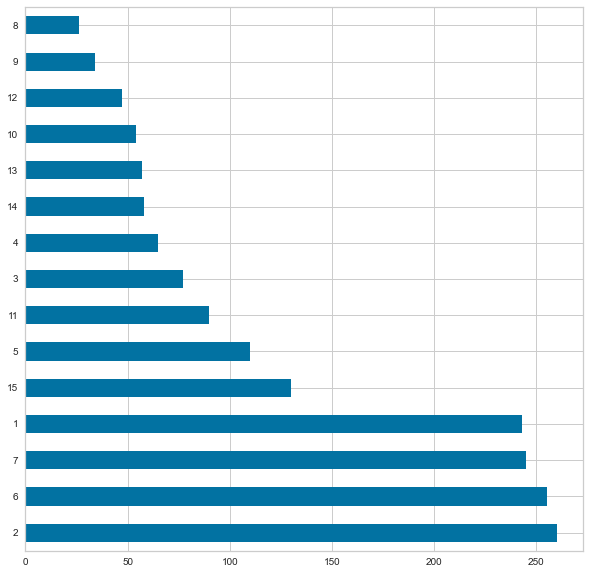

In [68]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(1, 1, figsize = (10, 10))

df['Topic'].value_counts().plot(kind = 'barh') #horizontal frequency plot

Text(0.5, 1.0, 'Topics by year')

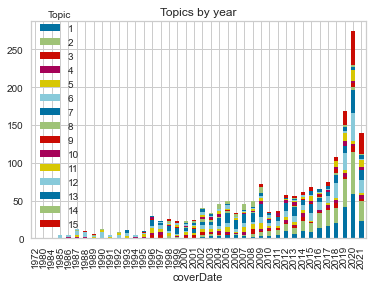

In [70]:
from matplotlib import pyplot as plt
agg_topics = df.groupby([df.index.year,'Topic'])['Topic'].count().unstack().fillna(0)

agg_topics.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Topics by year')
#plt.xticks(rotation=1, ha='center')


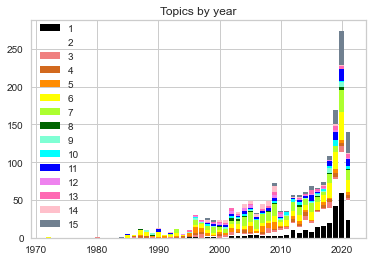

In [71]:
fig, ax = plt.subplots()

colors = ['black', 'white', 'lightcoral','chocolate','darkorange',
          'yellow','greenyellow','darkgreen','aquamarine','cyan',
         'blue', 'violet','hotpink','pink','slategray']
bottom = np.zeros(len(agg_topics))

for i, col in enumerate(agg_topics.columns):
  ax.bar(agg_topics.index, agg_topics[col], bottom=bottom, label=col,
         color=colors[i])
  bottom += np.array(agg_topics[col])

ax.set_title('Topics by year')
ax.legend()

In [72]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+ 'Final')

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ 'Final' + '.html')

In [73]:
pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.023695 -0.098615       1        1  15.469905
0      0.005514 -0.031746       2        1  14.350451
6     -0.138754 -0.008306       3        1  13.383897
5      0.113349  0.034456       4        1  11.446409
14     0.101723  0.061345       5        1   7.422758
4     -0.030884  0.079608       6        1   6.129016
10     0.048917  0.006606       7        1   5.421973
2      0.011916  0.021577       8        1   4.409839
3     -0.026905 -0.031679       9        1   4.332637
12     0.065629 -0.053608      10        1   3.923167
11    -0.083556  0.050863      11        1   3.517272
9     -0.040104 -0.028864      12        1   3.381744
13    -0.081198  0.047549      13        1   3.328512
8      0.040238 -0.042292      14        1   1.834106
7      0.037809 -0.006894      15        1   1.648312, topic_info=         Term         Freq        Total Category  logprob  loglift
227     model  2007.000000  2007.000000  Default  30.0000  30.0000
131  customer  1127.000000  1127.000000  Default  29.0000  29.0000
64      datum  1674.000000  1674.000000  Default  28.0000  28.0000
624    market   923.000000   923.000000  Default  27.0000  27.0000
145   network  1435.000000  1435.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
624    market    10.006793   923.559514  Topic15  -5.4028  -0.4196
115   purpose     8.145294   290.563683  Topic15  -5.6086   0.5310
64      datum     9.725772  1674.554588  Topic15  -5.4313  -1.0431
631  analysis     8.996543   886.362302  Topic15  -5.5092  -0.4849
193   service     8.353097   552.812288  Topic15  -5.5835  -0.0870

[857 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
471       1  0.323428  accuracy
471       2  0.168745  accuracy
471       3  0.284054  accuracy
471       4  0.002812  accuracy
471       5  0.005625  accuracy
...     ...       ...       ...
57       11  0.024623     yield
57       12  0.012311     yield
57       13  0.012311     yield
57       14  0.012311     yield
57       15  0.012311     yield

[7995 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 7, 6, 15, 5, 11, 3, 4, 13, 12, 10, 14, 9, 8])

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


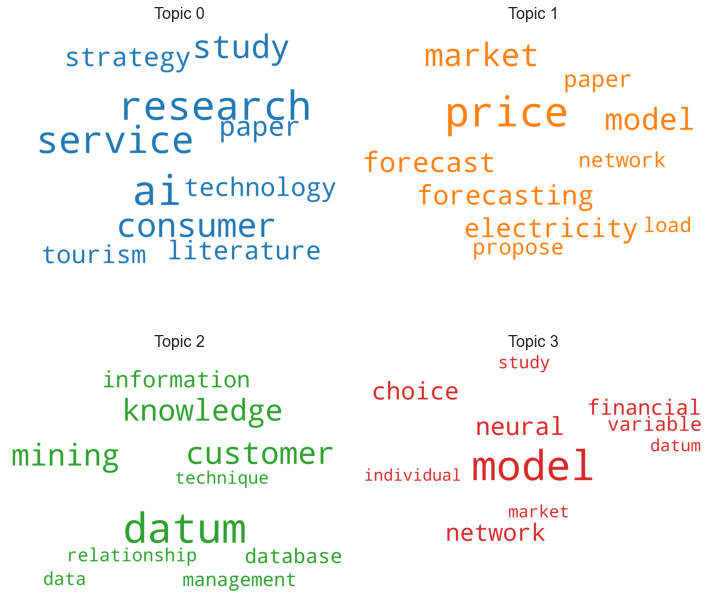

In [74]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=None,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [75]:
from collections import Counter

Counter(df.coverDate).keys()

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys([Timestamp('2021-06-01 00:00:00'), Timestamp('2021-05-01 00:00:00'), Timestamp('2021-04-15 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-01 00:00:00'), Timestamp('2021-03-15 00:00:00'), Timestamp('2021-03-01 00:00:00'), Timestamp('2021-02-20 00:00:00'), Timestamp('2021-02-08 00:00:00'), Timestamp('2021-02-02 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-01-27 00:00:00'), Timestamp('2021-01-12 00:00:00'), Timestamp('2021-01-09 00:00:00'), Timestamp('2021-01-08 00:00:00'), Timestamp('2021-01-01 00:00:00'), Timestamp('2020-12-30 00:00:00'), Timestamp('2020-12-24 00:00:00'), Timestamp('2020-12-09 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2020-11-04 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-10-25 00:00:00'), Timestamp('2020-10-01 00:00:00'), Timestamp('2020-09-15 00:00:00'), Timestamp('2020-09-12 00:00:00'), Timestamp('2020-09-01 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-08-14 00:00:00'), Tim

In [76]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/lda_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/lda_'+str(num_topics) + '.html')

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Logistic Regression - Still need to add the sentiments

### X: Topic distribution per corpus, year, Sentiment, author publication score, first author's university rank, 

### y: citation number

### Things to do
* k-cv to choose the optimal topic numbers
* bigram
* interaction term

### Results

We see that a normal logistic model performs the best in terms of f1 score

* We can try other diagnostics.

### logistic regression (unigram)

In [77]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import numpy as np

df.coverDate = df.coverDate.astype(str).str[0:4].astype(int)

X = np.column_stack([train_vecs, df.coverDate, df.h_index])
y = np.array(df.citedby_count)
y[y<=np.median(y)] = 0
y[y>np.median(y)] = 1

#import warnings
#warnings.filterwarnings('ignore')

kf = KFold(10, shuffle = True, random_state = 42)

lr_score , lrsgd_score, svcsgd_score, cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000, C = 1
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    lr_score.append(lr.score(X_val_scale, y_val))

    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    lrsgd_score.append(sgd.score(X_val_scale, y_val))
    # print(lrsgd_score)
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
                       
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    svcsgd_score.append(sgd_huber.score(X_val_scale, y_val))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:443: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int

Logistic Regression Val f1: 0.684 +- 0.047
Logisitic Regression SGD Val f1: 0.652 +- 0.036
SVM Huber Val f1: 0.338 +- 0.339


C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

In [78]:
print(sgd.coef_, sgd.intercept_)
print(lr.coef_, lr.intercept_)

[[-0.12416333  0.33284872 -0.16634649  0.14444773  0.28558172 -0.30922393
   0.34102468 -0.58070354 -0.57158062 -0.28058935  0.4243382  -0.00380789
   0.27499347  0.21404236 -0.51873581 -0.5100966   1.37798815]] [-0.31186698]
[[ 0.07042834  0.07166793 -0.04854694  0.0012357   0.01006644 -0.20079566
   0.12423415 -0.05019696 -0.09351754  0.0610475  -0.11783251  0.08867873
  -0.04211504  0.07589351 -0.00489998 -0.50068985  1.22644846]] [0.14318605]


C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
print(f'Logistic Regression Accuracy:{np.mean(lr_score)}')
print(f'Logistic Regression SGD Accuracy:{np.mean(lrsgd_score)}')
print(f'SVM Huber Accuracy:{np.mean(svcsgd_score)}')

Logistic Regression Accuracy:0.7064935064935065
Logistic Regression SGD Accuracy:0.6624772727272727
SVM Huber Accuracy:0.5122889610389609


C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Word Embeddings

### Loading the pre-trained Google's word2vec model
How to make it work?
- Dowload Google's trained Word2Vec model at: https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
- unzip the .gz file

In [80]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format(r'C:\Users\marco\Desktop\NLP_local\notebook\data\GoogleNews-vectors-negative300.bin', binary=True)

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Creating a sentence embedding for each abstract

In the cell below, we create the embedding for each word of the abstract using Google's word2vec model. Then we average all these vectors to obtain a unique abstract (sentence) embedding. This is repeated for all the abstracts in corpus1. Notice that corpus1 was created [here](#Creating-corpus1-and-corpus2).

In [81]:
# Create an empty list used to store the abstract embedding
list_word2vec_vector = []
# Create an empty list to store the words that our model does not recognise
list_missing_word = []

# Loop all the abstracts in corpus1
for i in range(len(corpus1)):
    # Creating an empty list used to store the word embeddings of each word in the abstract
    word_matrix = []
    print(i)
    # Loop all the words in corpus1[i]
    for word in corpus1[i]:
        # Try/except is used here because if a word is not recognised by the model, an exception is raised
        try:
            # Embedding the word using our model
            word_vector = model[word]
            # Appending the embedding to the list of embeddings
            word_matrix.append(word_vector)
        except Exception as e:
            # If the word is not recognised, it is stored in the list below
            list_missing_word.append(word)
    # Take the average over all the word embeddings of an abstract
    sentence_embedding = np.average(np.asarray(word_matrix), axis = 0)
    # Append the average vector to the list below
    list_word2vec_vector.append(sentence_embedding)

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [82]:
# Checking the words that are not recognised by the model
print(set(list_missing_word))
print(np.shape(word_vector)) # Check size of a word vector (must be 300)
print(np.shape(word_matrix)) # Check size word matrix (must be equal to num of words in abstract minus the words that are not recognised)
print(len(list_word2vec_vector[0])) # Check size of abstract vector (must be 300)

{'madupy', 'bridgerland', 'interfirm', 'icde', 'advame', 'neuroimage', 'identimod', 'approximator', 'bhmm', 'stationarity', 'admet', 'fasilitator', 'stratex', 'sdgcs', 'dpsn', 'shortcome', 'spq', 'rtb', 'ysneaker', 'schulten', 'brno', 's_kohonen', 'mackey', 'etransition', 'hughe', 'fresc', 'otcs', 'exergy', 'thresholde', 'recommenda', 'cdo', 'crrs', 'multisymbol', 'duroc', 'hta', 'mgedt', 'csde', 'costĝ', 'alberto', 'bso', 'mxnet', 'unobserve', 'aoi', 'icici', 'arctangent', 'mdp', 'ahme', 'scms', 'mlp', 'saarland', 'internatioonal', 'rbfn', 'utilise', 'lubext', 'smartpls', 'dissimilaritie', 'efa', 'aoc', 'discretize', 'ariba', 'sofm', 'rnns', 'ojf', 'pselm', 'summarise', 'servitization', 'pende', 'simplifie', 'bcpnn', 'personalitie', 'regularizaron', 'gfnn', 'aaai', 'gendere', 'amazonaw', 'multifractality', 'gsor', 'issn', 'innogps', 'ngarch', 'nonlinearitie', 'tuban', 'vama', 'thaiecontwitter', 'fce', 'metacost', 'idmap', 'uloric', 'lda', 'hopkin', 'qstr', 'odss', 'nasnet', 'mcnemar',

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Penalized Logistic model to predict number of citations with abstract embeddings

Run a (penalized) logistic regression to see if the asbtract embeddings using Google's word2vec model have any predictive power of the number of citations.
The y variable used is the same defined [here](#logistic-regression-(unigram)). The x variables are the 300 values of the asbtract embeddings. 

In [83]:
# Check that y vector has the same order of df
print(y[:10])
print(df.citedby_count[:10])
# check that corpus1 has the same order of df
print(df.description[:2])
print(corpus1[:2])

[0 0 0 0 0 0 0 1 0 0]
coverDate
2021-06-01     0
2021-06-01     2
2021-06-01     0
2021-06-01     0
2021-06-01     1
2021-06-01     0
2021-06-01     0
2021-05-01    12
2021-05-01     1
2021-05-01     0
Name: citedby_count, dtype: int64
coverDate
2021-06-01    one of the applications of robotic farmer-assi...
2021-06-01    the prime concern of this study is to explore ...
Name: description, dtype: object
[['application', 'robotic', 'farmer', 'assistant', 'platform', 'equip', 'machine', 'vision', 'evaluation', 'production', 'yield', 'harvest', 'damaging', 'product', 'situation', 'farmer', 'receive', 'proper', 'information', 'harvesting', 'post', 'harvesting', 'management', 'decide', 'require', 'human', 'resource', 'harvesting', 'equipment', 'storage', 'space', 'transportation', 'product', 'study', 'machine', 'vision', 'track', 'vehicle', 'design', 'develop', 'yield', 'estimation', 'kiwifruit', 'travel', 'kiwifruit', 'trelli', 'feature', 'intensity', 'histogram', 'histogram', 'orient', 'g

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
# Setting X as the predictior of the model (i.e. the abstract sentence embedding)
X = np.column_stack([list_word2vec_vector])

# Set K-Folds cross-validator
kf = KFold(10, shuffle = True, random_state = 42)

# Empty lists to store the mean accuracy (lr_score) and balanced F-score (cv_lr_f1)
lr_score , cv_lr_f1= [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    # Notice that I am NOT normalizing the data <<---
    
    # Set logistic regression model
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000, 
        C = 0.8 # Penalization parameter (potentially to be tuned)
    ).fit(X_train, y_train)
    
    # Computing mean accuracy and balanced F-score
    y_pred = lr.predict(X_val)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    lr_score.append(lr.score(X_val, y_val))

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:443: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int

C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

In [85]:
print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logistic Regression Accuracy:{np.mean(lr_score)}')
print(sum(sum(lr.coef_>0.1))) # Check number of coefficient bigger than 0.1

Logistic Regression Val f1: 0.582 +- 0.041
Logistic Regression Accuracy:0.5882305194805195
117


C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
